<a href="https://colab.research.google.com/github/Byeon-MJ/DL_Practice_Repo/blob/main/DNN_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 모델 훈련
* 케라스 API에서 다양한 기능들 활용해보기

## 손실 곡선
* fit() 메서드는 History 클래스 객체를 반환
* History 객체에는 훈련 과정에서 계산한 지표, 손실과 정확도 값이 저장되어 있음
* 이 값을 이용해 그래프를 그릴 수 있다.

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# 모델을 만드는 함수 정의
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


**History 객체**
* 케라스는 에포크마다 손실을 계산
* metrics 변수에 'accuracy'를 추가하면 속성에 포함

In [4]:
# history 객체 변수에 담기
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# verbose : 기본값 1 - 에포크마다 진행 막대화 함께 지표 출력
# 2 - 진행 막대 빼고 출력, 0 - 훈련 과정 생략
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [5]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


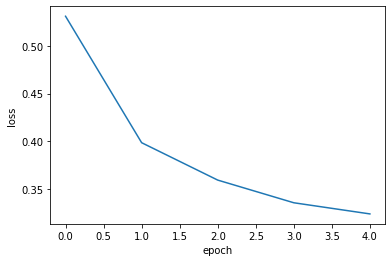

In [6]:
# Loss Graph
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

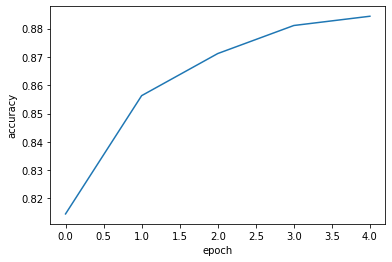

In [7]:
# Accuracy Graph
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

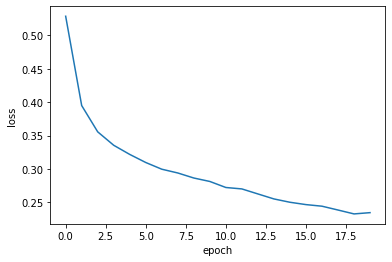

In [8]:
# 에포크 늘려서 훈련해보기
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실
* 과대/과소적합 파악하기
* 정확도가 아닌 손실을 사용하여 과대/과소적합 확인하기
* 검증 손실 계산위해서 fit() 메서드에 검증 데이터 전달

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data = (val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5313 - accuracy: 0.8133 - val_loss: 0.4118 - val_accuracy: 0.8511
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3918 - accuracy: 0.8593 - val_loss: 0.3747 - val_accuracy: 0.8688
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3531 - accuracy: 0.8723 - val_loss: 0.4488 - val_accuracy: 0.8406
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3300 - accuracy: 0.8819 - val_loss: 0.3655 - val_accuracy: 0.8733
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3190 - accuracy: 0.8875 - val_loss: 0.3571 - val_accuracy: 0.8751
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3077 - accuracy: 0.8923 - val_loss: 0.3474 - val_accuracy: 0.8823
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2968 - accuracy: 0.8942 - val_loss: 0.3537 - val_accuracy:

In [9]:
print(history.history.keys())

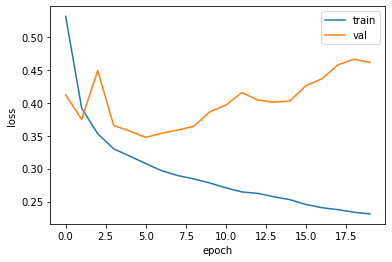

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5281 - accuracy: 0.8173 - val_loss: 0.4234 - val_accuracy: 0.8493
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3983 - accuracy: 0.8572 - val_loss: 0.3916 - val_accuracy: 0.8568
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3555 - accuracy: 0.8708 - val_loss: 0.3659 - val_accuracy: 0.8701
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3286 - accuracy: 0.8806 - val_loss: 0.3508 - val_accuracy: 0.8716
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3120 - accuracy: 0.8863 - val_loss: 0.3281 - val_accuracy: 0.8836
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2939 - accuracy: 0.8914 - val_loss: 0.3467 - val_accuracy: 0.8744
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2839 - accuracy: 0.8947 - val_loss: 0.3277 - val_accuracy:

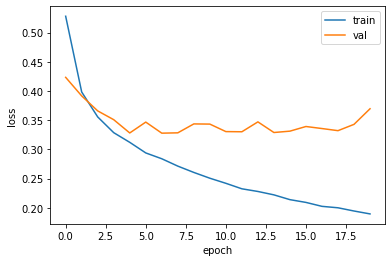

In [12]:
# 옵티마이저 Adam 적용
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7851 - accuracy: 0.7468 - val_loss: 0.5706 - val_accuracy: 0.8115
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5170 - accuracy: 0.8279 - val_loss: 0.4946 - val_accuracy: 0.8285
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4664 - accuracy: 0.8410 - val_loss: 0.4613 - val_accuracy: 0.8405
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4386 - accuracy: 0.8511 - val_loss: 0.4514 - val_accuracy: 0.8450
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4194 - accuracy: 0.8554 - val_loss: 0.4218 - val_accuracy: 0.8533
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4043 - accuracy: 0.8605 - val_loss: 0.4157 - val_accuracy: 0.8559
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3927 - accuracy: 0.8647 - val_loss: 0.4169 - val_accuracy:

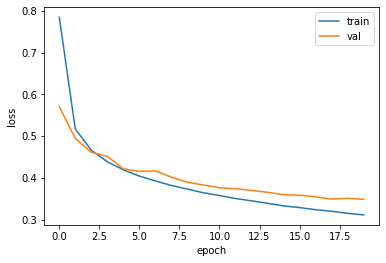

In [13]:
# learning rate 조절
# Adam learning_rate 기본값 : 0.001
model = model_fn()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃 : Dropout
* 과대적합을 막기 위해서 일부 뉴런을 랜덤하게 출력을 0으로 만든다.
* 케라스에서는 모델 평가와 예측에서는 자동으로 드롭아웃을 적용하지 않는다.

In [14]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5944 - accuracy: 0.7903 - val_loss: 0.4369 - val_accuracy: 0.8414
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4423 - accuracy: 0.8420 - val_loss: 0.3825 - val_accuracy: 0.8617
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4069 - accuracy: 0.8542 - val_loss: 0.3610 - val_accuracy: 0.8723
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3815 - accuracy: 0.8608 - val_loss: 0.3624 - val_accuracy: 0.8682
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3687 - accuracy: 0.8665 - val_loss: 0.3555 - val_accuracy: 0.8693
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3551 - accuracy: 0.8688 - val_loss: 0.3413 - val_accuracy: 0.8744
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3415 - accuracy: 0.8731 - val_loss: 0.3452 - val_accuracy:

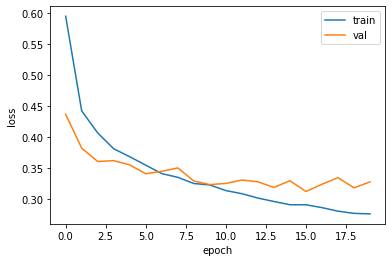

In [16]:
# 훈련 손실 검증 손실 그래프
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델 저장과 복원
* save_weights() 메서드 : 훈련된 모델의 파라미터를 저장
* save() 메서드 : 모델 구조와 모델 파라미터를 함께 저장
* 확장자가 h5일 경우 HDF5 포맷으로 저장

In [17]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=1,
                    validation_data = (val_scaled, val_target))

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5945 - accuracy: 0.7899 - val_loss: 0.4244 - val_accuracy: 0.8480
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4378 - accuracy: 0.8425 - val_loss: 0.3900 - val_accuracy: 0.8532
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4039 - accuracy: 0.8520 - val_loss: 0.3790 - val_accuracy: 0.8630
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3798 - accuracy: 0.8626 - val_loss: 0.3610 - val_accuracy: 0.8668
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3670 - accuracy: 0.8662 - val_loss: 0.3449 - val_accuracy: 0.8727
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3543 - accuracy: 0.8694 - val_loss: 0.3465 - val_accuracy: 0.8742
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3424 - accuracy: 0.8731 - val_loss: 0.3309 - val_accuracy:

In [18]:
model.save_weights('model-weights.h5')

In [19]:
model.save('model-whole.h5')

In [20]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Jan 24 07:56 model-weights.h5
-rw-r--r-- 1 root root 982664 Jan 24 07:57 model-whole.h5


### 모델 파라미터 불러와서 사용
* load_weights : 모델의 구조가 정확히 같은 구조를 가져야 한다.

In [22]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [23]:
# 모델 검증 정확도 확인
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 2ms/step
0.877


### 모델 전체 불러와서 확인
* load_model() : 모델 파라미터 뿐 아니라 모델 구조와 옵티마이저까지 모두 복원하기 때문에 evaluate() 메서드 사용 가능
* tensorflow 2.3에서는 load_model()의 버그 때문에 evaluate() 메서드를 사용하기 전에 compile() 메서드를 호출해야 함

In [25]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3419 - accuracy: 0.8770


[0.3418692350387573, 0.8769999742507935]

## 콜백 : Callbacks
* 콜백은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
* 기본적으로 에포크마다 모델을 저장
* save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델 저장 가능
* 저장될 파일 이름 설정
* 콜백을 이용하여 훈련 중 그래프 그리기 가능

In [27]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=1,
          validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7912 - val_loss: 0.4525 - val_accuracy: 0.8357
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4410 - accuracy: 0.8419 - val_loss: 0.3784 - val_accuracy: 0.8609
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4034 - accuracy: 0.8535 - val_loss: 0.3853 - val_accuracy: 0.8604
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3833 - accuracy: 0.8599 - val_loss: 0.3612 - val_accuracy: 0.8662
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3645 - accuracy: 0.8653 - val_loss: 0.3504 - val_accuracy: 0.8732
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3506 - accuracy: 0.8711 - val_loss: 0.3492 - val_accuracy: 0.8746
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3412 - accuracy: 0.8745 - val_loss: 0.3496 - val_accuracy:

In [28]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3183 - accuracy: 0.8870


[0.3182695209980011, 0.8870000243186951]

## 조기 종료 : EarlyStopping
* 과대적합이 시작되기 전에 훈련을 미리 중지하는 것
* EarlyStopping 콜백과 ModelCheckpoint 콜백을 함께 사용하면 가장 낮은 검증 손실의 모델을 저장하고 검증 손실이 다시 상승할 때 훈련ㅇ르 중지할 수 있다.

In [29]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5941 - accuracy: 0.7892 - val_loss: 0.4280 - val_accuracy: 0.8448
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4398 - accuracy: 0.8424 - val_loss: 0.3814 - val_accuracy: 0.8606
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4095 - accuracy: 0.8510 - val_loss: 0.3673 - val_accuracy: 0.8648
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3832 - accuracy: 0.8601 - val_loss: 0.3747 - val_accuracy: 0.8588
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3705 - accuracy: 0.8646 - val_loss: 0.3579 - val_accuracy: 0.8714
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3550 - accuracy: 0.8697 - val_loss: 0.3394 - val_accuracy: 0.8758
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3414 - accuracy: 0.8743 - val_loss: 0.3331 - val_accuracy:

In [30]:
print(early_stopping_cb.stopped_epoch)

10


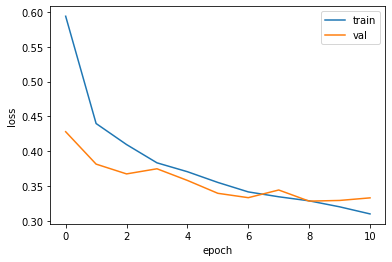

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [32]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3282 - accuracy: 0.8792


[0.3281634449958801, 0.8791666626930237]